<a href="https://colab.research.google.com/github/unachankz/goto_data_science/blob/master/notebook/fft_reconstruct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ２次元フーリエ変換

## 画像の再構成方法に関する調査結果

### 事前準備

テストイメージをダウンロードする。


In [103]:
!wget https://cdn-ak.f.st-hatena.com/images/fotolife/u/unachan_kz/20201123/20201123103032.jpg -O test.jpg
!mkdir images
!mv test.jpg images/

--2020-11-28 23:04:33--  https://cdn-ak.f.st-hatena.com/images/fotolife/u/unachan_kz/20201123/20201123103032.jpg
Resolving cdn-ak.f.st-hatena.com (cdn-ak.f.st-hatena.com)... 173.222.229.7
Connecting to cdn-ak.f.st-hatena.com (cdn-ak.f.st-hatena.com)|173.222.229.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 958046 (936K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 935.59K  --.-KB/s    in 0.05s   

2020-11-28 23:04:33 (19.6 MB/s) - ‘test.jpg’ saved [958046/958046]

mkdir: cannot create directory ‘images’: File exists


## ２次元フーリエ変換
* 2次元フーリエ変換から得られた周波数画像は、基底関数(空間周波数パターン)の寄与度を示す。
  この声質を利用して、対応する位置の周波数空間画像のピクセル値と規定関数とを掛け合わせ(cos成分とsin成分)、これらの計算画像を全て足し合わせれば、元の画像が再構成される。

## 参考
https://github.com/PacktPublishing/Hands-On-Image-Processing-with-Python/blob/master/Chapter03/Chapter3.ipynb


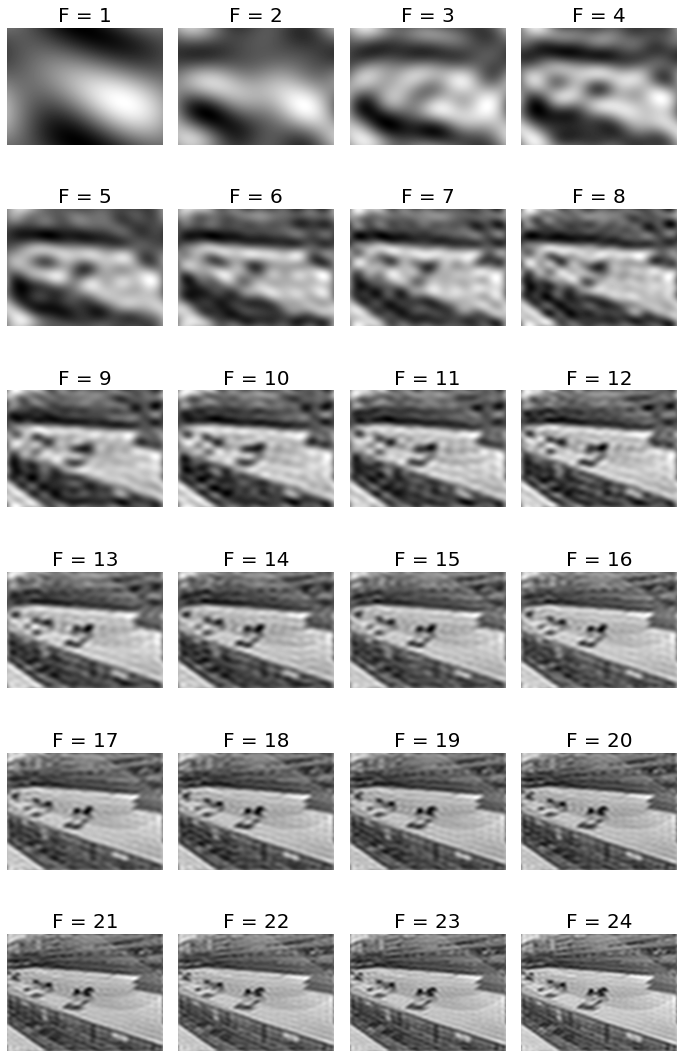

In [104]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
import scipy.fftpack as fftpack


def signaltonoise(a, axis=0, ddof=0):
    """
    The signal-to-noise ratio of the input data.
    Returns the signal-to-noise ratio of `a`, here defined as the mean
    divided by the standard deviation.
    Parameters
    ----------
    a : array_like
        An array_like object containing the sample data.
    axis : int or None, optional
        If axis is equal to None, the array is first ravel'd. If axis is an
        integer, this is the axis over which to operate. Default is 0.
    ddof : int, optional
        Degrees of freedom correction for standard deviation. Default is 0.
    Returns
    -------
    s2n : ndarray
        The mean to standard deviation ratio(s) along `axis`, or 0 where the
        standard deviation is 0.
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

im = np.array(Image.open('./images/test.jpg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
    freq1 = np.copy(freq)
    freq2 = fftpack.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
    freq2 -= freq2_low # select only the first 20x20 (low) frequencies
    im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()